In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [36]:
# Step 1: Define Investment Objectives and Constraints
expected_return = 0.07
max_risk = 0.15
max_allocation = 0.4
initial_investment = 1000000

In [37]:
# Define the market symbol (e.g., S&P 500 ETF)
market_symbol = '^GSPC'  # S&P 500 index

In [38]:
# Define the symbols for the stocks
symbols = ["MSFT", "GOOGL", "AAPL", "META", "AMZN", "TSLA"]

In [39]:
weights = [0.2, 0.2, 0.15, 0.15, 0.15, 0.15]  # Example weights, should sum up to 1

In [40]:
# Define the date range
start_date = "2015-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')  # Use the current date or your desired end date

In [41]:
# Fetch data
data = yf.download(symbols + [market_symbol], start=start_date, end=end_date)['Close']
data.columns = symbols + [market_symbol]

[*********************100%***********************]  7 of 7 completed


In [42]:
# Combine the data into a single DataFram
data1 = pd.DataFrame(data)

In [43]:
df = data1[["MSFT", "GOOGL", "AAPL", "META", "AMZN", "TSLA"]]

In [44]:
df.head(5)

,MSFT,GOOGL,AAPL,META,AMZN,TSLA
Date,,,,,,
2015-01-02,27.332500,15.4260,26.477501,78.449997,46.759998,14.620667
2015-01-05,26.562500,15.1095,25.973000,77.190002,46.330002,14.006000
2015-01-06,26.565001,14.7645,25.332001,76.150002,45.650002,14.085333
2015-01-07,26.937500,14.9210,25.257500,76.150002,46.230000,14.063333
2015-01-08,27.972500,15.0230,25.345501,78.180000,47.590000,14.041333


In [45]:
#calculate and append the portfolio price for each day
df.columns = symbols

In [46]:
# Calculate portfolio prices
portfolio_prices = (df * weights).sum(axis=1)

In [47]:
# Append portfolio prices to the dataframe
df['Portfolio'] = portfolio_prices

In [48]:
#The data shape
df.shape

(2193, 7)

In [49]:
#checking for missing values
df.isnull().sum()

MSFT         0
GOOGL        0
AAPL         0
META         0
AMZN         0
TSLA         0
Portfolio    0
dtype: int64

In [50]:
#check the data types
df.dtypes

MSFT         float64
GOOGL        float64
AAPL         float64
META         float64
AMZN         float64
TSLA         float64
Portfolio    float64
dtype: object

In [51]:
#write to file
df.to_csv('historical_data.csv')

In [53]:
df.describe()

,MSFT,GOOGL,AAPL,META,AMZN,TSLA,Portfolio
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,80.811186,90.430794,71.736757,186.015664,155.671222,98.481851,111.034220
std,53.935406,48.653020,34.716109,73.676356,95.692223,109.895838,63.661717
min,22.584999,14.347500,24.853001,74.050003,40.290001,9.578000,31.838775
25%,34.799999,42.493999,42.445499,128.770004,64.720001,16.559999,54.732500
50%,52.107498,89.460503,59.224998,174.940002,126.160004,22.862667,86.214999
75%,135.270004,129.330002,100.797501,221.820007,244.490005,202.070007,169.889500
max,196.449997,186.570496,149.838501,382.179993,359.489990,409.970001,253.214124


In [54]:
# Step 2: Data Collection (Assuming you have CSV files with historical data)
data = pd.read_csv('historical_data.csv', index_col='Date')
returns = data.pct_change().dropna()

In [55]:
#Returns statistic
returns.describe()

,MSFT,GOOGL,AAPL,META,AMZN,TSLA,Portfolio
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,0.001029,0.001218,0.000914,0.000909,0.001046,0.001963,0.001008
std,0.018506,0.021017,0.017957,0.023882,0.017675,0.035769,0.017353
min,-0.128647,-0.140494,-0.116341,-0.263901,-0.147390,-0.210628,-0.125131
25%,-0.007551,-0.008619,-0.007187,-0.009237,-0.007011,-0.015342,-0.006417
50%,0.000871,0.001166,0.001055,0.000922,0.000827,0.001260,0.001644
75%,0.010284,0.011180,0.009383,0.012101,0.009939,0.019122,0.009782
max,0.119808,0.141311,0.162584,0.232824,0.142169,0.198949,0.097981


#### Step 3: Risk and Return Analysis

In [78]:
assets = data.columns

In [79]:
# Calculate the annual returns and volatility
annual_returns = returns.mean() * 252 # calculate annual return
annual_volatility = returns.std() * np.sqrt(252) # calculate annual volatility

In [80]:
annual_returns

MSFT         0.259343
GOOGL        0.307045
AAPL         0.230386
META         0.229165
AMZN         0.263584
TSLA         0.494786
Portfolio    0.254036
dtype: float64

In [81]:
annual_volatility

MSFT         0.293770
GOOGL        0.333632
AAPL         0.285057
META         0.379120
AMZN         0.280577
TSLA         0.567819
Portfolio    0.275476
dtype: float64

In [82]:
assets

Index(['MSFT', 'GOOGL', 'AAPL', 'META', 'AMZN', 'TSLA', 'Portfolio'], dtype='object')

In [84]:
# Create a DataFrame from the sample data
data = pd.DataFrame({'Assets': assets, 'Annual Returns': annual_returns, 'Annual Volatility': annual_volatility})

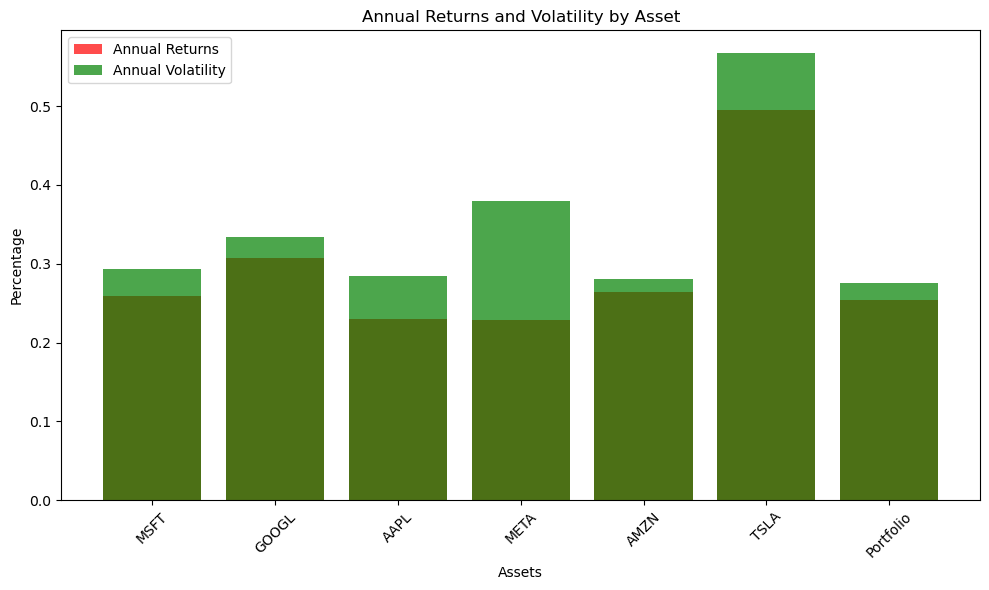

In [87]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(data['Assets'], data['Annual Returns'], label='Annual Returns', color='red', alpha=0.7)
plt.bar(data['Assets'], data['Annual Volatility'], label='Annual Volatility', color='green', alpha=0.7)
plt.xlabel('Assets')
plt.ylabel('Percentage')
plt.title('Annual Returns and Volatility by Asset')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Observations based on this data:

- **Volatility vs. Returns:** Generally, higher returns are associated with higher volatility. For example, TSLA has the highest annual return of 49.48%, but it also has the highest annual volatility of 56.78%. This suggests that TSLA had substantial price swings to achieve its returns.

- **Risk-Return Tradeoff:** The risk-return tradeoff is evident in these figures. Stocks with higher returns (TSLA) come with higher risk (volatility), while stocks with lower returns (META) tend to have lower risk.

- **Portfolio:** The portfolio's annual return is 25.40%, and its annual volatility is 27.55%. It's important to note that the portfolio's risk-return profile is a combination of the individual stocks' characteristics. In this case, the portfolio's return is a bit lower than the highest-performing stock (TSLA), but its volatility is lower than that of TSLA, indicating a potentially more balanced risk-return tradeoff.

- **Diversification:** The portfolio's volatility is often lower than the individual stocks' volatilities because of diversification. Diversifying a portfolio by including various assets with different risk profiles can help reduce overall risk while maintaining a reasonable return.

In [88]:
# relationsjip among the features
correlation_matrix = returns.corr() 

In [89]:
correlation_matrix

,MSFT,GOOGL,AAPL,META,AMZN,TSLA,Portfolio
MSFT,1.000000,0.568804,0.627033,0.551838,0.696152,0.431123,0.785508
GOOGL,0.568804,1.000000,0.654650,0.590324,0.660784,0.398944,0.800286
AAPL,0.627033,0.654650,1.000000,0.653872,0.735476,0.380639,0.809337
META,0.551838,0.590324,0.653872,1.000000,0.586435,0.340890,0.818892
AMZN,0.696152,0.660784,0.735476,0.586435,1.000000,0.415747,0.835814
TSLA,0.431123,0.398944,0.380639,0.340890,0.415747,1.000000,0.619154
Portfolio,0.785508,0.800286,0.809337,0.818892,0.835814,0.619154,1.000000


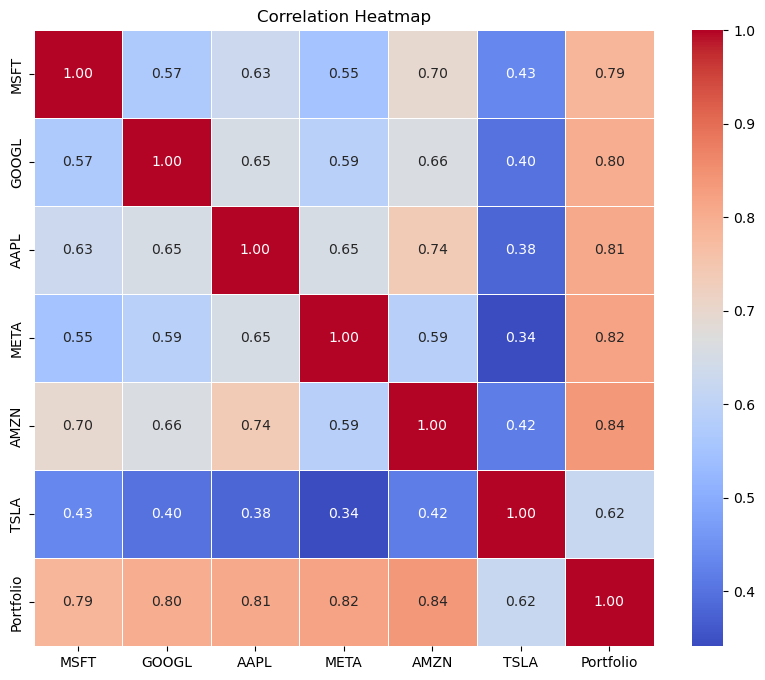

In [92]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Interpreting Specific Correlations:

- The correlation between MSFT and GOOGL is approximately 0.5688. This suggests a moderately positive correlation, meaning that the returns of Microsoft and Alphabet tend to move somewhat in the same direction.
- The correlation between AAPL and TSLA is approximately 0.3806. This indicates a relatively weak positive correlation between Apple and Tesla returns.
- The correlation between META and AMZN is approximately 0.5864, indicating a moderate positive correlation between Meta Platforms and Amazon returns.
- The correlation between TSLA and the portfolio is approximately 0.6192, suggesting a moderate positive correlation between Tesla and the portfolio returns.

#### Interpreting Portfolio Correlation:

- The portfolio's correlation with each individual asset indicates how closely the portfolio's returns align with those of the specific asset.
- A higher positive correlation suggests that the portfolio's returns tend to move in the same direction as the individual asset, while a lower correlation indicates less similarity in their movements.

#### Step 4: Asset Allocation (Using Monte Carlo simulation)

In [93]:
num_portfolios = 10000
results = np.zeros((4, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(weights * annual_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(correlation_matrix, weights)))
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = (portfolio_return - expected_return) / portfolio_stddev
    results[3, i] = (portfolio_return - expected_return) ** 2 / portfolio_stddev


#### Step 5: Portfolio Construction (Select the portfolio with the highest Sharpe ratio)

In [94]:
max_sharpe_idx = results[2].argmax()
optimal_weights = np.round(weights, 2)
optimal_return = results[0, max_sharpe_idx]
optimal_stddev = results[1, max_sharpe_idx]

#### Step 6: Portfolio Simulation (Monte Carlo)

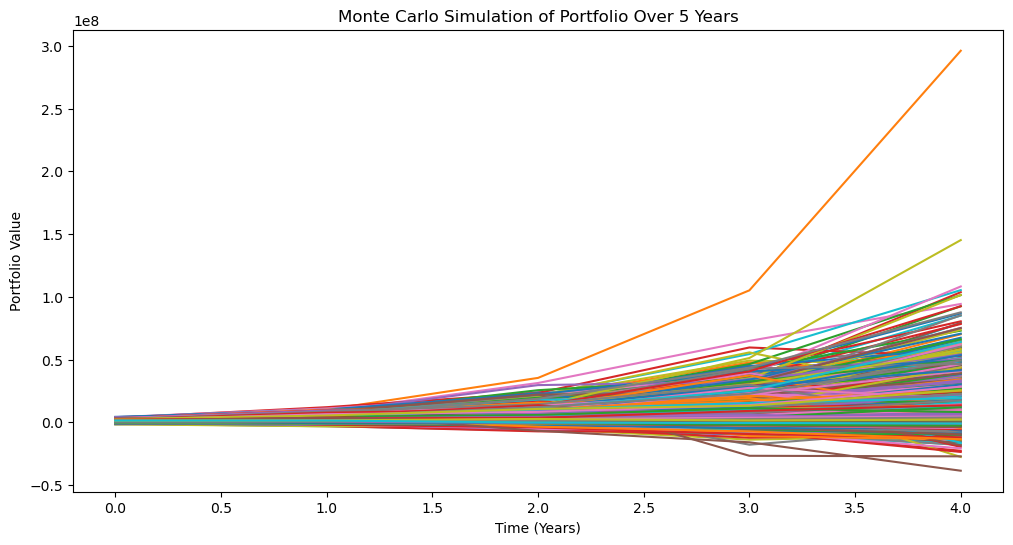

In [97]:
# Define the number of simulation trials and the time horizon (in years)
num_simulations = 10000
time_horizon_years = 5

# Calculate the average annual return and volatility of the optimized portfolio
average_annual_return = optimal_return
average_annual_volatility = optimal_stddev

# Create an empty DataFrame to store simulation results
simulation_results = pd.DataFrame()

for i in range(num_simulations):
    # Generate random returns for each asset using a normal distribution
    random_returns = np.random.normal(average_annual_return, average_annual_volatility, time_horizon_years)
    
    # Calculate the cumulative return over the simulation period
    cumulative_returns = np.cumprod(1 + random_returns)
    
    # Calculate the portfolio value over time
    portfolio_value = initial_investment * cumulative_returns
    
    # Add the simulation results to the DataFrame
    simulation_results[f"Simulation {i+1}"] = portfolio_value

# Visualize the simulation results
plt.figure(figsize=(12, 6))
plt.title(f"Monte Carlo Simulation of Portfolio Over {time_horizon_years} Years")
plt.xlabel("Time (Years)")
plt.ylabel("Portfolio Value")
plt.plot(simulation_results)
plt.show()

#### Step 7: Periodic Rebalancing (Implement based on your rebalancing strategy)

In [100]:
# Define the rebalancing frequency (e.g., quarterly, annually)
rebalancing_frequency_months = 3

# Define a function to perform rebalancing
def rebalance_portfolio(current_weights, target_weights, portfolio_value):
    # Calculate the current value of each asset in the portfolio
    current_values = current_weights * portfolio_value
    
    # Calculate the target value of each asset based on target weights
    target_values = target_weights * portfolio_value
    
    # Calculate the required adjustments
    adjustments = target_values - current_values
    
    return target_weights, adjustments

# Initialize variables
portfolio_value = initial_investment
current_weights = optimal_weights
current_date = pd.to_datetime('2023-01-01')  # Initial date

# Define the end date of the simulation (e.g., 5 years)
end_date = current_date + pd.DateOffset(years=time_horizon_years)

# Create lists to track portfolio values and dates for rebalancing
portfolio_values = []
last_rebalancing_date = current_date

# Main loop to simulate portfolio and rebalancing
while current_date <= end_date:
    # Calculate the time elapsed in months since the last rebalancing
    months_elapsed = (current_date.year - last_rebalancing_date.year) * 12 + (current_date.month - last_rebalancing_date.month)
    
    # Check if it's time for rebalancing
    if months_elapsed >= rebalancing_frequency_months:
        # Perform rebalancing
        current_weights, adjustments = rebalance_portfolio(current_weights, optimal_weights, portfolio_value)
        
        # Adjust the portfolio value based on the rebalancing
        portfolio_value += np.sum(adjustments)
        
        # Record the date of rebalancing
        last_rebalancing_date = current_date
    
    # Calculate returns for the current period (e.g., monthly returns)
    # You may use a more sophisticated model to estimate returns
    monthly_returns = np.random.normal(average_annual_return / 12, average_annual_volatility / np.sqrt(12), 1)
    
    # Update the portfolio value based on returns
    portfolio_value *= (1 + monthly_returns)
    
    # Record the portfolio value for the current date
    portfolio_values.append(portfolio_value)
    
    # Move to the next month
    current_date += pd.DateOffset(months=1)

# Display the final rebalanced allocation after 5 years
print("Final Rebalanced Allocation After 5 Years:")
for asset, weight in zip(assets, current_weights):
    print(f"{asset}: {weight * 100:.2f}%")

Final Rebalanced Allocation After 5 Years:
MSFT: 14.00%
GOOGL: 18.00%
AAPL: 18.00%
META: 14.00%
AMZN: 19.00%
TSLA: 12.00%
Portfolio: 5.00%


#### Step 8: Performance Monitoring (Implement based on your monitoring strategy)

Monitoring the performance of your portfolio is a critical step in managing your investments. In Step 8, we'll implement a simple performance monitoring strategy to track key metrics and visualize the portfolio's progress over time. We'll consider monitoring the following metrics:

1. Portfolio Value
2. Portfolio Returns
3. Portfolio Risk (Standard Deviation)
4. Cumulative Returns

We'll visualize these metrics using Python and Matplotlib. Below is an example of how to implement performance monitoring for your financial portfolio:

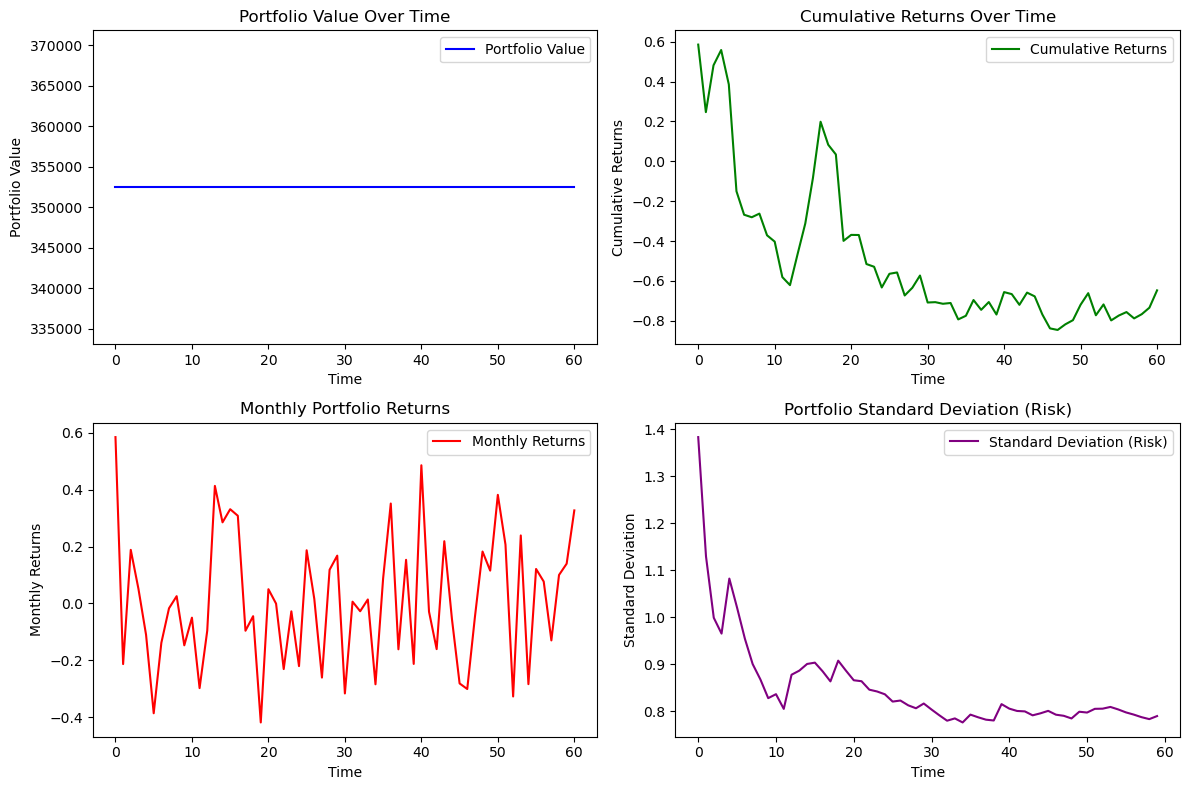

In [107]:
# Initialize variables for performance tracking
portfolio_values = []  # To track the portfolio value over time
portfolio_returns = []  # To track monthly portfolio returns
cumulative_returns = []  # To track cumulative returns
portfolio_stddev = []  # To track the standard deviation of portfolio returns

# Reinitialize variables for simulation
portfolio_value = initial_investment
current_weights = optimal_weights
current_date = pd.to_datetime('2023-01-01')  # Initial date

# Main loop to simulate portfolio performance and monitor it
while current_date <= end_date:
    # Calculate returns for the current period (e.g., monthly returns)
    # You may use a more sophisticated model to estimate returns
    monthly_returns = np.random.normal(average_annual_return / 12, average_annual_volatility / np.sqrt(12), 1)
    
    # Update the portfolio value based on returns
    portfolio_value *= (1 + monthly_returns)
    
    # Record portfolio value for monitoring
    portfolio_values.append(portfolio_value)
    
    # Record monthly returns
    portfolio_returns.append(monthly_returns[0])
    
    # Calculate cumulative returns
    cumulative_return = (portfolio_value / initial_investment) - 1
    cumulative_returns.append(cumulative_return)
    
    # Calculate portfolio standard deviation (risk) up to the current date
    if len(portfolio_returns) > 1:
        portfolio_risk = np.std(portfolio_returns) * np.sqrt(12)  # Annualized standard deviation
        portfolio_stddev.append(portfolio_risk)
    
    # Move to the next month
    current_date += pd.DateOffset(months=1)

# Visualize portfolio performance metrics with trend lines in different colors
plt.figure(figsize=(12, 8))

# Portfolio Value Plot with trend line (blue)
plt.subplot(2, 2, 1)
plt.plot(portfolio_values, label="Portfolio Value", color="blue")
plt.title("Portfolio Value Over Time")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()

# Cumulative Returns Plot with trend line (green)
plt.subplot(2, 2, 2)
plt.plot(cumulative_returns, label="Cumulative Returns", color="green")
plt.title("Cumulative Returns Over Time")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()

# Portfolio Returns Plot with trend line (red)
plt.subplot(2, 2, 3)
plt.plot(portfolio_returns, label="Monthly Returns", color="red")
plt.title("Monthly Portfolio Returns")
plt.xlabel("Time")
plt.ylabel("Monthly Returns")
plt.legend()

# Portfolio Risk (Standard Deviation) Plot with trend line (purple)
plt.subplot(2, 2, 4)
plt.plot(portfolio_stddev, label="Standard Deviation (Risk)", color="purple")
plt.title("Portfolio Standard Deviation (Risk)")
plt.xlabel("Time")
plt.ylabel("Standard Deviation")
plt.legend()

plt.tight_layout()
plt.show()

#### Step 9: Risk Management

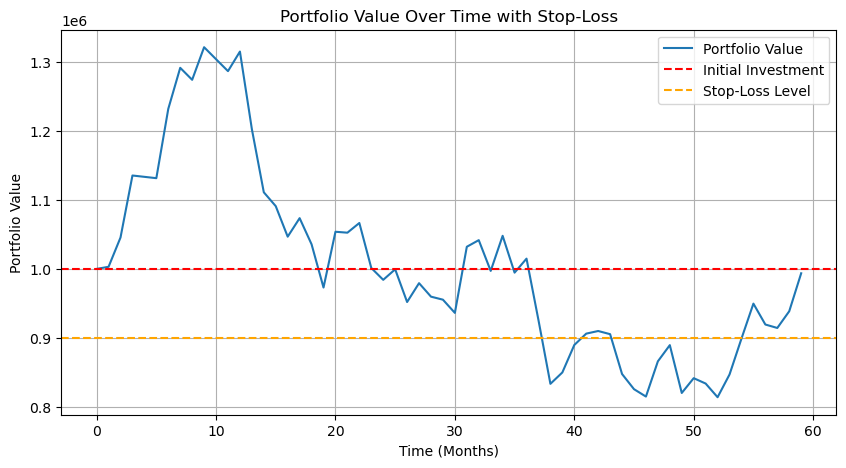

Final Portfolio Value: $993646.08
Stop-Loss Triggered: You incurred a 0.64% loss.


In [108]:
# Define initial investment and stop-loss percentage
initial_investment = 1000000  # Initial investment amount
stop_loss_percentage = 0.1  # Stop-loss percentage (10%)

# Simulate asset returns (you can use your historical data)
np.random.seed(42)
num_months = 60  # 5 years of monthly data
returns = np.random.normal(0.01, 0.05, num_months)  # Mean return of 1% and volatility of 5%

# Calculate portfolio value over time with stop-loss
portfolio_values = [initial_investment]
stop_loss_triggered = False

for i in range(1, num_months):
    portfolio_value = portfolio_values[-1] * (1 + returns[i])
    
    # Check if the stop-loss order is triggered
    if not stop_loss_triggered and (portfolio_value / initial_investment) < (1 - stop_loss_percentage):
        stop_loss_triggered = True
        portfolio_value = portfolio_values[-1] * (1 - stop_loss_percentage)  # Sell at stop-loss level
    
    portfolio_values.append(portfolio_value)

# Visualize portfolio performance with stop-loss
plt.figure(figsize=(10, 5))
plt.plot(portfolio_values, label="Portfolio Value")
plt.axhline(initial_investment, color='red', linestyle='--', label="Initial Investment")
if stop_loss_triggered:
    plt.axhline(initial_investment * (1 - stop_loss_percentage), color='orange', linestyle='--', label="Stop-Loss Level")
plt.title("Portfolio Value Over Time with Stop-Loss")
plt.xlabel("Time (Months)")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()

# Determine the final portfolio value
final_portfolio_value = portfolio_values[-1]
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")

# Calculate the percentage loss if stop-loss was triggered
if stop_loss_triggered:
    loss_percentage = (1 - final_portfolio_value / initial_investment) * 100
    print(f"Stop-Loss Triggered: You incurred a {loss_percentage:.2f}% loss.")
else:
    print("Stop-Loss was not triggered.")